In [1]:
import pandas as pd
from cian_api import (
    get_all_apartment_info_from_json,
    get_ads_by_page_number,
    nested_check,
)
from tqdm import tqdm

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 1000)

# Получение всех объявлений от собственников 

## Первая страница

In [3]:
offers = get_ads_by_page_number(target='sobstv', page=50)

JSONDecodeError: [Errno Expecting value] <!doctype html>
<html lang="ru">
<head>
<meta charset="utf-8">
<title>Captcha - база объявлений ЦИАН</title>
<meta name="viewport" content="width=device-width, initial-scale=1">
<meta name="robots" content="noindex" />
<style>
html {
background: #F4F4F4;
height: 100%;
}
body {
font-family: Verdana, Tahoma, Arial, sans-serif;
height: 100%;
}
main {
background: #FFFFFF;
border: 1px solid #E8E8E8;
border-radius: 3px;
}
main > img {
display: block;
}
@media (min-width: 704px) {
body {
padding: 0 20px;
min-width: 704px;
max-width: 1376px;
min-height: 625px;
margin: 0 auto;
box-sizing: border-box;
display: flex;
align-items: center;
justify-content: center;
}
main {
margin-left: 8.333333333%;
margin-right: 8.333333333%;
width: 100%;
padding-bottom: 35px;
}
main > * {
margin-left: 10.15%;
margin-right: 10.15%;
}
main > img {
margin-top: 35px;
margin-bottom: 35px;
position: relative;
left: -34px;
}
}
@media (max-width: 703px) {
body {
margin: 0;
padding: 20px 15px;
box-sizing: border-box;
min-width: 320px;
}
main {
height: 94%;
height: 100%;
box-sizing: border-box;
min-height: 515px;
padding-bottom: 20px;
}
main > * {
margin-left: 30px;
margin-right: 30px;
}
main > img {
margin-top: 20px;
margin-bottom: 20px;
width: 170px;
position: relative;
left: -15px;
}
}
</style>
<script type="text/javascript">
var onloadCaptcha= function(){
grecaptcha.render('captcha', { 'sitekey': '6LdpqSQUAAAAAJXo9mQJY2QYw2rSi2D0-ZXctcw_', 'callback': setCookie });
};
var setCookie = function(resp){
var form = document.getElementById('form_captcha');
var input = document.createElement('input');
input.type = 'hidden';
input.name = 'redirect_url';
input.value = location.search.split('redirect_url=').splice(1).join('');
form.appendChild(input);
form.submit();
};
</script>
<script src="https://www.google.com/recaptcha/api.js?onload=onloadCaptcha&render=explicit" async defer></script>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-KC2KW5');</script>
<!-- End Google Tag Manager -->
</head>
<body>
<!-- Google Tag Manager (noscript) -->
<noscript><iframe src="https://www.googletagmanager.com/ns.html?id=GTM-KC2KW5"
height="0" width="0" style="display:none;visibility:hidden"></iframe></noscript>
<!-- End Google Tag Manager (noscript) -->
<main>
<img src="data:image/gif;base64,R0lGODlhNgF3APYxAHa+2m2Hl1t2iqrV5P///2S11Y7H25XT5PH6/Mnl69Ds9un4+4iYpa+7w+zu8fv7/d3w9uT0+AAKL//9/7je6vz4/MnQ1WzE2/n//3HJ3SlGXliw0tbc4Knd6sLs+v3+/l+/12e515emr+Hl6Pf6/BIySgMkPhs6UTRVa4mHibvFyqPK16awtfL09WdmbPn++v/6/6WYh///31RRWuXj/7z//8v+/9b3/d7+/9zx6PLe/+n17O3/9fX//8vp4eP99h2WzLjV3NLr5/H8kuv/+9z1M7Tj+5K4x26hu7HThDp5hG2aOXapxH6vxcHJ/6T0/6re+oKxyZuv/pDn/gFjmPvo//7w/vT/9XZxdIyf+3Cr/36Oz2Z3xYH+///++Gpbv22M9v329NrE9vD37KmJw9nUyv/35Pn75PTU4f7+8dHHxP//5/f77fD24MS6trOopPDn3f//6vK+/+bc3v/659ml/tyT/82Z///N//7X/+mz/8WP/1PL/0++/2DI/wAAACH/C05FVFNDQVBFMi4wAwEAAAAh/wtYTVAgRGF0YVhNUDw/eHBhY2tldCBiZWdpbj0i77u/IiBpZD0iVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkIj8+IDx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IkFkb2JlIFhNUCBDb3JlIDUuNi1jMTMyIDc5LjE1OTI4NCwgMjAxNi8wNC8xOS0xMzoxMzo0MCAgICAgICAgIj4gPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4gPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bWxuczp4bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iIHhtcE1NOk9yaWdpbmFsRG9jdW1lbnRJRD0iMjM0QTU0RDIzMjY0ODVGQjZEQTk4NEIzRDJBRkMwMzIiIHhtcE1NOkRvY3VtZW50SUQ9InhtcC5kaWQ6MDBFOUI5Mjg1OEE1MTFFNkI2MEU4MkFGNTg4Q0EwQjUiIHhtcE1NOkluc3RhbmNlSUQ9InhtcC5paWQ6MDBFOUI5Mjc1OEE1MTFFNkI2MEU4MkFGNTg4Q0EwQjUiIHhtcDpDcmVhdG9yVG9vbD0iQWRvYmUgUGhvdG9zaG9wIENDIDIwMTUuNSBNYWNpbnRvc2giPiA8eG1wTU06RGVyaXZlZEZyb20gc3RSZWY6aW5zdGFuY2VJRD0ieG1wLmlpZDoyMTFiNTUwNS03MmM4LTRkZmYtOWQyYS0zZDQ3YjgxMGY3ZjkiIHN0UmVmOmRvY3VtZW50SUQ9ImFkb2JlOmRvY2lkOnBob3Rvc2hvcDo5OTFiY2RmZS1hMTBkLTExNzktYjJmOC04OGY3NDA4NDFlZWIiLz4gPC9yZGY6RGVzY3JpcHRpb24+IDwvcmRmOlJERj4gPC94OnhtcG1ldGE+IDw/eHBhY2tldCBlbmQ9InIiPz4B//79/Pv6+fj39vX08/Lx8O/u7ezr6uno5+bl5OPi4eDf3t3c29rZ2NfW1dTT0tHQz87NzMvKycjHxsXEw8LBwL++vby7urm4t7a1tLOysbCvrq2sq6qpqKempaSjoqGgn56dnJuamZiXlpWUk5KRkI+OjYyLiomIh4aFhIOCgYB/fn18e3p5eHd2dXRzcnFwb25tbGtqaWhnZmVkY2JhYF9eXVxbWllYV1ZVVFNSUVBPTk1MS0pJSEdGRURDQkFAPz49PDs6OTg3NjU0MzIxMC8uLSwrKikoJyYlJCMiISAfHh0cGxoZGBcWFRQTEhEQDw4NDAsKCQgHBgUEAwIBAAAh+QQFLwAxACwAAAAANgF3AAAG/0CCcEgsGo/IpHLJbDqf0Kh0Sq1ar9isdsvter/gsHhMLpvP6LR6zW673/C4fE6v2+/4vH7P7/v/gIGCg4SFhoeIiYqLjI2Oj5CRkpOUlZaXmJmam5ydnp+goaKjkSQQFAcHGRkHHQoLH0ITpLScLwqqFxerq7oZFAu1wpkLHb68yKsgBwqxw8+REQcgu8nWIBkeztDcigvT1uG9GQrd5ockHdjhx8m7EefxggrtvdUZ9cod2/L9eQjgkO1yBQFCgmn3eEHwxxAPhHq7IGAgUgxih4YY53ygsG7cQiMkDiS8cABBxpNuQt7TRYEfEQj4eEVESVMNwJUZPh5Rmaxczf+fZRDEHAcviTGZGRIAXSoGgQGcwYziVMq0apebMi/4PPIN51arYK98UCdz2QskCXRV22UyrFsrCqipZemSAISnu9QemPW2r5QFGbCppUYhgjMECgzIzavVr2MoGxfromagAwVUFyRnPnD2sWcmEQLPnUwNhGa1Xz+rPsJxtGvXy+qunk1ggeLXuGfS3k0kbW7Y+3gLJxDy9GtsRYfzpvd7bkvlwscan7ssKnTeoadPTn2ddmvcy0h0H27bODWd43knMB88vfDio0NkSO5++YUQakOAoFBf+QeEkxlgXX+8QQAANfhRReBwHYSg3wHiLUheBvhxJ6F3BRwQC18X7gb/EHod7vYBCbKF6FeJJoYFQVtFbOMSilR8IOOMMz5B441O3EijFSOwMMIVE1hgQRY67tjEBxMUCSMlaZV0BAKXRRllByBawQEDWGaZJQdNWKDllw4w4eWXWf44xQgumDCkFQ5o4EKEVTggAplYqtDECHPSKUInCgCwQYYsDhFBCH8WWsAGG1ykBQsSmODoo402wMQHDDT66KVcLlHppY42aucTfHGAggQlrCkFXyKYUIKkVp5g6aUSCNBlCa9eegInfW5wX4ZwChHBgQ4GSyh/WjSgagnIIqsqq0pQemyyJZhwQqZKpAqtsqVKoQIKjp5gahSzjKCBoyiEWQUH414b/20AXaarrgab5Cosr0T8KmywBRCbhbHXnrDspAw8C+20TFg7sLTfNtGAv8h6a0XAyjJgJbcnXGsCu2K6ey28mfRZwL0h0OsrACCHrC8W/Fq8KsACJ0vwEgZDizAUIkSrrMNUoHusCRpQK4WoLa/bbtAlcHwJPR+XDOjISp98Rcoyr7yEs+qW8HK1Qc/cxAMM2HxzwjYGIPDFD+SscbIXD1210ZV4XDK+EBLwa9LzOm0F1GhL3SzE6l6dRMxo47xEC2KPLXgUKjAc+Kc/c6tu2hkTzfYkbr8NNwkLAEA3vnZXgTe2zCZBdd8+IwH410w4IEDWhz9BwuqPC2BuFEA/jv/xEhacnezkkVRuOb4DGNj0Fp/bHDoSo/db+hGnR9u6EbU//rzCXkfNwhTRy3y7ErlLLglfCoT8e8kGkAxyvsRnrbfofCtfMOtgE2GB41VrDUUEaVYdLQpmQqGz7Wp7FyV8N755vQ19xVLf8Y6QvIEtzwjNs1+LVKA7mU1vCSyo3uNEsCTo0U97AdwY5TRXwBJyLn2PWx/y2ufA90kvfg9ggeL0J8E7fbB+PaPdDZW1vSR0b22SIKAJx4fAfSmQZVXzm+ngB5KaEc2C8cOa/mTGgLI9IXto6yESfihASMhriCUsQBFRdsSpsdBlDyxCBFtHOEdNMXBRRAIWaajEJfz/z2JaPMIdRfiIL4KxgIfqHBWK9y8zEq2OEGTiEFTnxjeizglcU5/trNiEOa5rBCPggCY3yckRNKCCReujn/5owkCiUGULNEID0ehCiwmOA2l64gufYIEZJgsFO1RVHD14SFz68pe/1MAUeYcIP5KSiBsQ5BQIqUIGnrFhaSTCGtc0v26prH4XBInYqqaCCAqAknbcobI4Rc5HDbMRxjzm70yZwBSmskXPtFo0hzBNAmyLaCYQQACwuUsiJC5oKJjAHqHFODuC0pEIDeUi0knEP7LTiO5EIulaaUEOfBKfAuiRIgcHO4tdL5KPQ0EFKinOhCKUmIQQ4joLQLLNIdNJ/xBFpUTdB7OsaSAAFXRUAMJUTyY0QIP7MxcXr3U9JljSpI5E6TxIOMQNGOAUYhzioeJGxogaMonzFELz3qgqBrSAAB/oqRIckD+LiYAvJNimxVDw1XDKEqlALCahxCfGj9X1riHbAADgsZGo2tWuIfNrXTcA07uVcW+HzCoBtkrDEojAig8QaxJYkDX+yc+WydqTQZ9YznKe8xC5uqtgA/tXvcKDLxQ41F8dJNi65jVuHUwCM99JhFVCk6KOlFbowrpRJDhAnCbQ7BDSWtn+ybGkJwCmcnEpTP0p1Q+hFa1076pXEI0FUdPN7lR7JYXZzrSFNU0ozwpKgMj2lnmV5f9ACxzAXge04J+PYwCMLHkxTNr3vvZ1wEXjmlI/aXe6pmVgB1T7X9ESlrtQ8O5VJxre3KJgebydZRLEZVMBWPjCFm6uxXKYBPrmEXqgfO4ewvenAlN3r6KjAHZNPFiqdvew7Essbh+XT+MOwbwSRoJa6+dZGsq3wzn9cBGGCi0R5yEB/mWxGAPcrAGsWMmEHdATFIxYrM5YZhcLE4eGEGFXxpEDFYMrVzmsR+AKWX4hJoQBSgxlAFSJgSpms4kRpaAEq4+8S0yijdHb2AC0dctCwLGXkTCBHYuZhgEAJxE8HMIi91fO/62ujZwM6ewiagCBmvITGaCCBnj606BugAr/BKC/E4ig05/e81ZVJQIE11ay/sTsoQdd5qydeQhE3l0hDFRp6UoaCg+gdIEvrWhNT/EEyE62spPtyIqFuajSZB0LliRoKO6ko7Oe4sVcPVAeNlrXu06ypd08hWA/2dcbGICrnVC8cXb2UlzllHDp2TKe0fbV5xXCT/H5bnL2rYZCYHTk+EsIXo/7zZB0snbTvW52vzXb+pu3VseGgn7eGNYEIOsTBcCAFDAgAB3/eMhBzoCy4hHBAsddmgsxC4MbmNxWwMAAAMzwpz0c4uqS+GKfZQIXKJbLGHfi41zggAeQgARGP3rSkX70XDsPbCnn3soP4fIlw7wKsfiAwgdb/3Ob4xyuOjdYjYEN6xEAtwTQboKh0SaAtg6h20IbeBcR4fJfW0FGYBX2pcUD6Bd/Halhf5Sfo9Bla984YFlzgZRVfuciwB1yjCc41f1kdy1oHVFdxwJl+835zk4x7KSqohBiO3rE+/tbuauVOe+t485KgK2L1oDqTSCBWwuhlp291UJDcHUuXH4FpO+ShQMw/OLr0/jEP77yiR+AAKAg4kboms5zNGrk69Nn1U9+8jnu9itqH/nGHUEKrC+AtE94+9+3fSAKEgbEZFosD4g/DORP/wfM3/71v//940+AtSNL5xyAZ5CBfwTIf1ymdAQ4fw3HBC8QfwmYdEgiCw5YgGMPEIFLMAH5R38psgT+51gb+BgdOH0faBUhOIJ+UYIm+BYomIJhsYIsSIKdJYIvWBMqkCV5giU/N4M6uIM82IM++INAGIRCOIREWIRGeIRImIRKuIRM2IRO+IRQGIVSOIWqEQQAIfkEBQoALQAsIgAQAPEAVwAAB/+AE4KDhIWGh4MfHxOKBAQICQMHGZQHFBCOBIyEi4ien6ChoqOkpaanqKmqn4qCBA8UGSAgF5QZF7MHCo6Jm6u/wMHCw8TFoQQQsrW2zLIgAxiajJ3G1dbX2NmpBAqzzd+UIAYI0trm5+jpw8je4ODiH9LU6vT19uedj7Luy98gHeXuCRxI8Nc8Ah1A+KN1iyEzXJgKSpxI0RM1AhEu9AtnIAGECBA64GoG4kDAiihTDlyEUCGzZ/EyYdxnS2OEkypz6jTnyIDLcCblxVyg8SUFnDuTKg3GcsGtmhcWBMyX8KXJpVizrmoEoShQXoYwepUVVKvZs6O4OZQFEBEBEk//OYJFS7fuJrX9/jma5wpBXFkG5todjFVRvIx5A2vii9dWScGEIyt9u68Wrl2b8hE48FPWUcmglzrifEsjCADkFk9wlICWRo0hIoaerZNbgde1Tu/KRIICw6LiINMeTpAlBp+4ZYWwRGEActyXVROfLpHbBugNZ83CHhwp9e/oND+HTh53gYh8wavXdhHC7fLlM2y4mn69fW2jN5SG/xpECKn3BajOIyG4xl8tG7RVn4AMGkMABdcdiAsAJJSzYIMYppLPCwAYCB0AGm2QgIUXZmiiKSwlECF8wZ3oooMEjEfeBpi9aKMw1sE3n3c39mjKZiv2V8BNPhapCkYFhADd/wYDLFaikVCGNUCQ/pEjyJNRZrkaCSEoGeJnWoZ5DIQaFQBAPGKm6YkjAFwnIo9qZtnKagpssIFiceaZCEsGbICeMFhiWY2g2RCKDzZzIpLiVb40esqciRby5DzUBGoRKp1EqqGmpRh2qSitGIrNVFcypQqnnR6SqaiAFlOfpwRlYgisMZVqqkWCogqoqCwJd4qv9bBaiiOyhSXTsXB2iqxMoizLLCjOyoqKIyI48AsBKlg7rDTRHutWt89eS8CUYBYCwQAUpKtuuiTYeqQIDMQrLwMpqJDsBCPMO28KHLCCr77zjuBoKPG8gIIEFtyrajwOSBAAUjDAYOwgmYwQgP+8KVwcQAACH3KsCikAHC8wjkBo54i9PAiEnSyzDKC4Jkgg88wyCwCsKyrQrLMIcBLQgM40N6BwqQQ4oIEEJnAwtLEBII0JET30QMQCCCywANREZD3EEDToIMMQR4TdBApKlM3C2SyIAEHUbPcQTRBhh40E2WXXrQQD4kJoZgFv+vLgBl0GHkKSL6/iCAomlKD44g7fvJoFiS/OOAs9qxC55CWYYC+oqxHAQQkSKK70NiOYELPNWRPxAw5TX506EUMkIQYNMhSBxO1MGGBAFCsci0HbbBNwBO5IRKH7EbrrHoUChv8tON8jcguh4F2aWfiRBGhwOeMP9ww55oqbQPn/J9huv7jmCsdkuQQnJD76tAKEDnoQBGTNww/48/A6ETv44EQEGBACE5pAQAIy4QhuA54CCbACJBTwgQ9kQhCwpzfqQY8XzqNeCABwvW0QAHHga5z3zKc4CQiNfJYDX+Y2dwwCsCBmJ8hcCd73Iw7ID3Qo+IDUevCDHNxvfxiAwBKGwI0BRvAIRPidAtvGQAdCsAlRiGIUJLiKFdiJby1j2QRXE4QstqyDpEDWCZAWM5rZDCfHsiEZd4ZGmeRsjUFDCrI+kAKgSYCG0DrW0coos4dBDST7y1oFOLCEIkyABkYs4AETuMTgNfCJBJSiBDFAyUpa0pIEwAAONrlJGxzg/wBTAGUHQtmBdH3SBpv0ACinUMp0lRIBl4ylLCn5iCDY0pYBUIIA7iaCXtZLlhi5ZRAaoEtdMqCX8eJALJGxglseYZcCEMAx4cWAEQATA8KEGwpQIIBeUtMBs1ymEJppyxWQrZu+FAHbrCY1qEWNCCRwQBKG4AMpJNKASFRiI3vQREhCMYoS3GfbfmeDJ9TAoAatgQ0WytCFOgIHNThoRBdaAxwcS6AYRcbtNpq8KBDhogukwEaRkLvkIWuBAwjARkuqu2PpEHiZHN5IS9okmehToDpkwkiRYFKZDLSR0egnBBd50yUK9YmSDAJGE2iDiDr1qVB1KhGaGtWIMnKpAv/FSBPuSUAkjCijCSDpUKMglayK9IlMIOtLjbqA4UHygJTEKhOD4MQHRgEJR8ikXINHV7TmM6OPhGRSMUrQqhr2sE+1wVX3usAIbPWJXiUAWOuqSLJKdp8PoqwB1dpIrRbvrUeI614fwQSuFjCyjOVnX4eKwKIuMLBIBahS90lJqiL2tlVdbGqD51jTojarYUWrZc2q2a1yFnjRUIBOo+BPuLo2qwP4LCTxqtuMrvaISQRscSMpW9r2wLa4De9Eq7tbrfr2q8AtblrLitmzjnUBa41aNMIqXdCKFqsYKa0/u3oUxhLguopEYHyNClsIDnaJhRWvgq363NSaF7LoxWz/cN972c66N4LHjVo8RJrW/W41tA0mcH3f2gRyjBbA+MxuVgts1+4qsLYLXrBiQzza3kK4wp2dMIbZa2H1ZtgRDeywh50rV416+LT0O7F6Q5vJcAJ5u/+c4mwHigHwxji85HWwjSH4Wwn7mMdGvXBl4Ru1J5vWvjRmWzQMoF60MgHMWUXxh4nwAgTY+c547sEHWFzAA6u5yleWcZb9u+UHdjnHX8ZxSL+sQ8m69cgBvm9WhbDdATDXrkjoXZHlTMC4efrTYbu0YF0sX0AHesGDrvFjuRxhRAsXzjAV82alQoAF3NXA+kXzUin56NP2jsU6xQR+Ob3V0hr72Mf2sJ9h/3xqBc94t41dtaFbbVQdj1nRsU40BJow4ikigQJyJvJkb0xpA2dar9aFMqQhfWBmN1vBqS5yoU9L7QVae9bYZqKsjYuM5dpVp0cJN4gxqsNbGzq0H8BAr0+7i6X+V93rVnZ33f1u8RJhwNB+MKvzzcR7GxfW+l4yBUoraijeLnp8Fjdm6Vpybn+VAB7HK7pXDvGI+zOpFFcw6059cWgzcd5drTdMPb5ejpd531AkOaaZgIm3URagR4hHJY2KgFVLEoGZjOnT77qLSy4QwFIMu9jHTvaxMyEBpo4xDuJBBJ5jnNDSprfRy0z04ba35n1Oa2ocsdq0Kq93LkXWI/2uvP8bHEvHfufdsmKSib4bL3mQ312Uyw7FyCtPAVYWrw2U+IG2B7rnPtf4tOfOz7qDPHhI92emg7CC1q/gCFEI2woCcIITaEADKJhB7lFwBNa7XgWvj/0KmqCB2uNe97kXAQU8bQAU2P4Eu8+9AMDt+hWoAPawn73xn1/822/z++AH/+1t3/3ioyDQOLhv590eeqC7nPQwTzRxIx77XEcybgNQgh37eIQnxq0DB7N/vFN9FKB/+xcAw/dAnjYA8bN/AhAFDIAEETiBEiiBR3A0+3dlOLBE6/d5b+dw7ndo1SZ/dwdpTNB6UHQEAKCCn8aA+ycBmQZqsscEL2gC3cd9GGj/RyXwejJ4BCn1ggHQAWFjAENYhCsAgC+odgnHgZ53ZaAHd+cFf6Y3d5m1X1N0QKGGPLEXewvYgHYUgzI4ADn4gmQINAEwAD3oggfIgz3ogwFoR6jESXI4h5sELnvRVBSlUHS4h3boLESgXwNkAAdgAADAT3YIAWKVVp8kiH04YYo4iINoAAPgAR0ABR21givYhTMTM3wEhi2IBGUYikBjAmzYgk2ziTSDgG0YNgPwhkgjMzHTAXzjHxoUOP6xhSeYALq4i7rIARTQAcDYAUbQJrRYiwUSArEHAAeUABzAi87Yi0EgRbAnANyEAhcTLynQAERwAxFwA9zIjQlgAK1n/2lkw03XSC9BsI3diAMKwAErkFaxNzfVqATWmEsCoAGZxoWgpoZfWIr4N0aw+IqcWIYDyUcSIABouI9eaIb+uI+uqDNHEABUcAJUUJEWeZEXSZEdNkAcGXdNMDwTiZEiaZEU6UQdeZKrFjevV4MBAE3RBE0bo1IPSTMn0JLRpAQBEEX4t5BAcwKr6IMLaZCeiH+nSIZldJSvWINEuI9FmZR91JAt+IZIaQJH0EAjeZVKYAAN8JOe1gAGcJVXeYJc2YMGKYpmaUcakJCy15Q6g5BQuZMBqTNDKXsD6ZRluX9lyUcIqZBA+Jb4N5MzI3tIAJYXmZV+2YOvR5gX2QSH+f+Td3mWkCkBKKCWVcmWZbSXP8mPcQmD/qiZqBiZd2kC4miKNGOQqriKrViaAamSg0mYStCYbbgCX6mYjDmWbfiYj1mDOvOYk+lps/eFQsiVaniXQymbBmmQ4Zec4JebB0mZQNmXmRmAd+mbrTmSWWmbPbiVhFmb2CmDoBOQzImXcZmbvamSRVlGTOCcbeiZNDOUHWCAu8k+HTAAA7AC9Gmf9Xmfk3ieTikBo0mUqjkzp7meD3mUn2aVIqkEVdmdMiibYQmbXMmcBSmQFKqbfFSea1maPoidntmJbLiSASozSKCeiPmddiQAwcmKPJmKjZma+wdqCGqRhsmg2XkEIin/ljQKanyElJDJo/uHoZU5MzsIoXDZnyLKhkg4iuxDomkYlHG5oKzIn0k5oGkoleDZoNVJBVqZo4hpoxaJo1zqaZF5lj4KpL8pARrQegyapP2YoS84ot25AsyJoewpoEz6ly+ImK2ppmHaoF4Kpn0aNs53e4RaqIZ6qIiqASaqM0DqgpNJpL5Je+NHqLUHhisgACVwqLWHApAapeRnqLYXqZ9KqScwlzAqAKNaqLHpQJ2Kne9oqn3aeuIom7Jaq7R6q7Oaq61nBE4qM0B6BAwgAHyao7darDBafbM6rHFqq8m6lL6Jq67nqsyqrDAaqFzZqtbKoHUqmc4pidn6reAaXq7iOq7k+q2aeaF3Wq7quq7s2q7uOpbb+qvvOq/0Wq/2aq3nOjPyeq/82q/+2q/xmq7/OrAEW7DZyo/IKbAGu7AM27BpCJ86k5YOO7EUW7EqyQDfR4/0aI3YarH/GggAIfkEBe0AMQAsIgAQAPEAVwAABv9AgnBILBqPSAIJQjkcMplDR7H4CCfJrHbL7Xq/4LB4TC4fX4rn5QKFrjOUhXlOr9vv+Dx30Xm3/1AgBwpWeoaHiImKYxEHIGyAkSAZHoWLl5iZmmYLjpGfbhkKm6SlpqYkHZOffoBsEaexsrN3Cq1ukBm3gR2WtL/AwUcInn9sUxAQCY65bRDC0NG/ELdsEBhEfNUd0t3emh8Uq6HPRiQHzRcHCN/t7nrnuWsUvkQQum3W7/v8ZcTyGcodiQdoVL+DCLcgwBcKVpI++TIkSEixIhEEBgDKeQhwosWPCP/lu2DwSCeAJUGqdPdBVT5BL5AkWAOJDbuVONspeERzXj3/AhAysqF5AEvOo9IWZJhE8xGFCIUQKDDAcyhJpFihhau65pGBDhSaXOA69kDMrGh/RVjas+sjEGRppkxL95S4tnjxCvpZt2+mBVTzCtbntzCpmYP19jLMONO5uHknOWxMWZGtxD3pVd6MqCXknoI2ch6dZ+3nrnNJq6ZzV7AgEqtj1wEM+ZFA2bjJJKi9OLdvMY/bhsgw+bdxL7ZC0AwBgsLx514+MOtqQDT060kgAHik3CP270g6hGB+ADb480WUKk+N/jyFAgesGG2Pntht+ug/kOCL3zj//rhBcFMRltTz3xgfJKiggtEtuGAXDj5IxggsjGDGBBZYQEeEEm7x/8EEHNYx0zrDhGWiiR3cVwYHDLTooosccGHBizQ6sMWMNLpooRgjuGCChmU4oIEL5pHhgAg5tqgCFyMgmSQdCgCwAXwDDhFBCFNmWcAGG3BTBwsSmCDmmGE24CEDYY6pZoxaoKmmmGEu6YVRHKAgQQlAhmGUCCaUYOaKJ6SppgQCyFiCoGrOEeUGF4QAX5FCRLDdeJRi6VwdDfRZwqab9vlnFh8woCmnJZhwAptZ8Elqp3iGoQIKYp6QJxhYjKCBmCjYSAYHt65aagAy9uqrGYtW+igRklZKaQGX0pHpqid4euaopJ66harVmjorFw1Eu6msZYjaKQMrwnrCqiYAe/+jsKuWEWUByjpanpUAxOtos3M8i66f0/pagrVaYEuqtl+IUGqn4I7Bq6YmaIBqGHVS26m6WljALqlk2AKvvVRGWm+8zNqh78D8ahGqxN8+jITAnBLMxQMMHIzwttEFQG26Dyh88cTBolzCGO/au+y8km5sLL5mjNxyyaCK6yvAqaLsshYt2Hxzwq562/IJckIMq6/p9uyvGEELPTQJCwBg9LJIl6E0q58mcbK/UCfB8sxbOCCA1Fh/QcLeYAugKxgRg01xFhb7HEbZZi87gHYct03G2wfHjcTcT6t8xN2l9n1E4WB73kUDMpPMghigD3x4EomPzYVRCjjauL0GfKz/bMiYSs203E5Dq7kRnE99hAVf+yt8FxH46G+pKOz4xcKGiz0scmrPzrHQuDuru+VHYO77tXzTLMQHKuw8sOhbsFA62CIc+HnxqkvfbheMW29/9vlu32/m4Icu/gMs0NryjreFEcDPeA4j3AF5ti7FcaF+9rMe/pKmP5P1rlq/K0LwREcCg/nsfOKL2vIGxoCceSF1LVsdElo3PS0UK4IRLMAE3VbBpvmsbisLXxGqJqYRbi2ESEDhAHGoBeihS4WfM9/PXCglGMJwS5IbA+WkZcEbZpAIG5yV3nroQ7x1AWa6M5wJuSDEX41gBBxIoxrXOIIGKJGJG3DiEzcQRTFM/3F3l7sgp4gIPB0KgQM++qD/vGABAXIKBQvsExCNUMZ/IfKRkISkBkaYhRfK8X50FFkNeWfF/qErYcSL1b6Mh76B2MxfKgieAMZYxAV26k2wHBMlkWDJS0owk7kDGx67p8eUeRKEBHiVz0wggACQcpFEUIEhN4WCCRhxVV0rohK7SM0lGqGWEpQjFDWpS+4ZwXsY/OXWOODGYQqAQn6kGuDQdTowgg0FFSCjK6tJzSNAsHEyrNfaZrclEmmvm/v7XsCkpoEAmE9MAbBRFrm1PubpioWrOt0WGklPH16zejDcgAGYIMM5zit/AK0i3a44BM75sE8MaAEBPrBQLThAef/oEoFRSHBKdKFApa0UZEVdN4TYxRFeMgRqUIPqqA0AABbh6KhQZUfUoW7AnzQMqQ1HKs4u9kkEJnxAS7PAAqk1jwiF9JkIJjrNWMZylkJY1FCVKlShGhUWRnnPlBy1MbY29amwcV8W7uhNAvXyXyQVgklJGTeWphMJDnClCcZKBJp61XlBnOcJIklZRE5yeT2V0lo3u1aj3qclXOKsaPsJqTDwNaDhHGg1GxZNAmj1sJvzKgda4IDaOqAFypQaAw5UxnSd8bfA/a0Dyuk6tY52s2/tXge2dFzkftSOm8xjJ1VrVRRozrCDTIKtCCqA7nq3u5dFVwKT0FskMvKNPm3/bmePKjcKhFa9QcWrFKPLy+mKcIRiOucRXptdJNTUeGcd4G7Je1DzFgGipEqAZuErw+SCagDvZfBTreOF04qUf9QFcEIJMJ8hYPeTQOTAuXZ60vG+T2oGBqsSDTAlBm8JACrqnntbDF8ueecLd2xtDukG2R0brwQBwGmHhcBfECNhAv8l8QADwEoilFd+pDKuej0bHQjT+LhcGkCVKvxBBqigAWAOs5gboAIBLO8EIvhymHtMAJNetbQE2moRcqvkk5byyQ0cm3auLFoqf+EBVm5ulpvM5RGe4NCITjSiu3iuEUsUi3xjgfuKDExzrLPO+A0AnAnwzBRCmVNC2DOW/2EsBkBHGLkbGMCmR/dBs8LypG9iLKTF29c4w1YIpBumq18NLQJyWrEpHgKCQR3qBSOX1GMw9WhTvWpWY1rJsi7pzVCAzCFQ+odGeOkHBcCAFDAgAN3+drjBzQCYHhHOeK7YGzkMFGPHF9lkwMAAOJvlZjv72TuNtmBHZQIXBJYIH640FhtaKhc44AEkIAHCE75whSd82J2jWboRt+4hiPrdMf6CFT4AYacyG6T4rqi+28ww/Xrh2l4cggF192guJLllAsDpEDrNQHU70B4L9nMZErTSQNeb3VENOT1HzieEyhxCcgaj1FxAYZvrsrU0/9WnN3WEPeu8Dhzn0sfp0N/VXXvdrCMk+p1KOL7oiOqss7IYomRZ6yRYDZYSuKmTNbB2E0gg2EIIayxpGQJ43yHrK9ArIbsbAMIbvpiHLzziF1/4AAQABcsbecxGDqEyJ76YD7O84hXP7aN3gQObTzxkR5CCywug5drlfOizk3E6SGXLZvjAA2YPA9rb/gG1x/3tc5/72RPg5ZsaOQd0rHHdG9/3Hma48Wtvby28YPbLX/iHrgD94z9g+lqYwO5p/xvgl4DyAMKN98Ef/tiMv/zHOT/6uy/W9bPfX+R3P2feHmv550YFLnJSi/79nSAAACH5BAUHACUALEAAEADzAFcAAAf/gAQEE4SFD4ckiSSHhY2OjR8fE5GCJAkdBwYZBwcUEIKDkoWij6Wmp6ipqqusra6vsLGPgrKpkYQEDxQZICAXGcC9IAcKtISSpLXKy8zNzs+qxtCNBBC8v8DZ2b0DGIOTydPi4+TlzdLiBAq92u3aIAYI3+b09fb3jujQ1ezu/rwGPnwLh6+gwYOuSpR48EwUAQS8/mFzB6LDPIQYM2p0pJBEs2QEOoCg6CvDhZLaTn7ayLKlwY4fCxGIcGFiMAMJIESA0OFku2EXXQodCg2mM0khR74bIBDUzIjZakYISrSq1VdGnQkyoDTYAWOUCCyo+Y4C1ato05bKugzpApNR/y8suOhQ5LuvavPqbcRWGSUIZL3qw0VzItCzexML7btMHUpeFk0RIAH35mDFmFkyloV0nWGLBAg+rAzwcubTCDfDiiSw8DYDtMI5NvwVMerb91TLmhzx18lik4JPEHSgKy+zuJOnLuHxGfGRNU8CkBdqOIEEvqJfCLFSuffczKepK6CdF4BioEhQKEkWnunv8KF1aB6TAAau5UGE6ERhAH7tv1UX34DT6FaLOhsAaJIwvSjonm0ERhiLIAwdhQsB/wGooXYFrESQhCC+8l4spFRD3oYbZrABXh+G6OIqIypD3AYmoaidfnO9qCMsMcqIQAjZ2fjLBpG1uOOR+UDIDP8BFCQopHQkzGMkkkf2SCIuLwAQJIAA1LRBAlJOSaWOVnI2XAJOoujemGyeUuaBGG4J4AbAtWknNUqeo0Cac+J155/W2UPAAXzWBEIBUwH655syRlBACHMOEIqYioLIqIwD8KmfPMdUyualB5IQAqReIuepnaAe2GRNBQAg0Kmo5ukcAQAk+KWssEqY6iu3DLfnBrDhmqtGTjl14TwXFavsrqshZcAGHlpoC0KU1lMtKslUUAEJ2sKgbSHfEgLDBDCUa+64MFihQwVWwMDsI72aglQCfpJybSm9xuuImMnYq4qR90JyTMDy6utKr7mgMccIc8ChhhpzCOIAxONaYfH/xVVUYXEVeehhRx5V6PHugQIL11YtBvOK78AHEYyvQx8oPAIcVTzshhsNuKGGG3OQe/HGGatrhxwe21HHyHhSxdoxYElb8CopNxQwUkhXHfMcHMxRBhocuIGFC25YUUYZ6eqgMbsZa6zDHnjIscceRy8rt9zUYJBDsUnPrffefPftt3V+Kwt44MO9IIIDgc/dwAiDJC43GmVYsLMaFpTRcBigwOAAGjpYofHPnuOBRx6kO443NR9kahY61QwARQcUxE4B7FGa3nixIgTAwO68B9DAsoMT4IDuvO8eQAAcCF7sCMQXfzzjfAdPwAgaSGBB4tKPIIEApgfPQQAKc/Cw/xhjWyAGHAR4UW4VOpxvBbs/ky5/HgrNb//991dBAw0OkC7G//LT3/72NwAnFNAJ/wMg/haIvzo4sA56+IIEv0CGClawDvjTAR4eWIc7TJCCFiSDGPInBw56cIIhFCED58cxB+rBf2TA4AozKIc7vDAPcojhDGnIwT184Q4OFJ0QRddAG3LwiA6Ug0KGyMQmMjEPA6SBBpuogyjSIGNXdKIWtyhEt73tbRAMYto4pkU9fHEPRoTgGKtQxjOm8YVj5KIQcXhGIWZMjk704h7kILo74rGJdXCjHu6AxtHJMQ+BPKMbv6jEEvyRilbcHyQjKcVHPvIOmMwkJveYh0O6Tf+TmsRjx9AISkxakoheJGQdTtlERKKxkKwc4ihLaUpRBpKWmtzjEllZRUpOUYi9jOQvY/lEPOCSk54kZS7vIEoz4vKUdCQl3IiJSmXu4YXUnCUoYXnIW+Jyk3IYFS8pOcBhBtOKw6TmEI8ph05ykY7PPKQzaWnJUVpzldn0JiGZ6U5WarOUf3TlN8EpTkuek5w0ACY506nOTrKzn1qE5zaZKU9lgjKg/9wkPmMp0UxeE6L1nGcuN/pOfbKzoH88KEKnqNL9MVSdxqQlMt/5SXpWNJ7vFOg2ScrKfW6znRwVqUcp2k2LyjScIXhkSxGa0KW+lJgOPSpIW1nTZTbTqJn/POQGsapKqArVoxgMKlanaUuu5hKpKWXqQp0K0yY+NJk43WJGQylXY5qVrNC061uh+dV9BtSkR0XpFpeqVqY+laMxLeVM5VrVoV41rsX0qUx5GtC+glWsiqWsE3X6zT0K1omELexK28rEvTLWrI+1KVXfNlC8PjKqrQVqSMdK1JKa1aNolatodxvFw/ozsT+d6hMbu8naRtSyxiWiGW+rUX8CVrHJvelO/8pcQuYWtLzNbiVJK0TTRpS4WZUuQJ+43IE2t57glSk2X9vXaQpXls/96WfnqN3s+jav3t0seLkpV+TKkrPmdW1ZoTtRQ1aWtjkdXXzPOt/R1de+3O2u/1Thqtr+opaIAA6wZr/L1UEqdr2ppSUSO1gHPnrYvNadLxQfzNv71hO4Z33vHPcbXfJe2KFcveuGNwtYuGWYkAYW7zYVyVpFojjFSZUliyEcYRjjVsbVhOxm/Ytjxe6xvTse7ljlUIX9hjXER94ka4/s2SQTcclMJi1sg0thqwpZk1Uesh5CNtYsl9aoPlbwlqGs3OqGObYoXbF2Q7vQJjsZnHzu6EXfjEkIStajnJxrV8GM6NF5mc+jQ+6fUaxLRzq4vp0ktC+5u+YYt9mxjC4udA0paQFv8dF+HeJzF3tcP2/6qAUowKe1209RCzPC+V2tlFup6VW7s9V2zvRYQf+M7EQjl8jQtvUem+TrSIK02r1ta6mffOriUrqzq+wnsrUq0+jC2rpQlnQmSQzEdpPYgWSWAwEG8GDhYrucpA22lodtYzLLUJZYLqpiuWy/Ltc53e2t8RMXjFuFgHqw9XVxXfUtSxp/+8Ok6/d062pWPXj84x+nuLIzG+SIMhycguC1HO/tUpiKPMoVrnVrPzrlOtv2mNE+psJHHnOT+1neBMgupvFwUB0Y/ehIP/rQ86hIOzh9aMfe4nK/+HQ7lNyJU39b1Z/ezvcmUutVzzjWz7j1spu97DRvI9mffnUnfn0PZx9ayne7dKKXUwFP8IDe916DvXug7woIfOB564T/whdeCoiXguELTwPPrbEFOkCg5BOv+MU3fow0iIAYFu8EyiOe85F0wOYXT3nQR3H0h/e86le/etALUPScL73lyYn6zrPeCXMvbN1F10sdeKALwA++8Icf/CfU4PjIT77yle8HPjifD32Ifh/8UIMnWP/61q/+8Z/wfOhLvw9TqP71l28D7nf/+dEP//KTX/4+oP/7xid/Dc5P//rb//vTX38N2v9+6cdf/8dnA1PgfvWXe0y1ewqlA09AfAwofAD4gMjnB9PnBxRIgXxQgRiYgReYgRqIgeBnA+z3BBwogX3wBCD4gAI4gRz4f8o3gCP4gjDIgSV4giGoghV4gSYI/4Ep+IIGSE4IOERG93sNyIAQWIQxeIRImIEfGIIy6Ac5qIMuOIJPiHzt94L4d4X4N4LTR4NU+AQ2iIFTqH87OIKCkHRmKDp8lE0LOITDt39FCIA2IIFJOIcwuIRdqITUx4VwGIUrqIdx+IUVOAWCOIiEWIhyKINhuH9e+IKJSH58mIFlSAMQQAMKQImCJ0VIt0MZVANs6IBvCIF0GIpaOAVcWH4e6Ac2oId7CIgU6IZdyIrgdwOpOIu0SIs4IIJaiIrKV4VSqIq7+IgYKAjLt4bE94koCIINaIwoeIiiKIp2GIC4KIepaIxj2Ifsx4wZ6IpFWI0eGIa8aI0oCIwVKP+Mw1iMyoiCnNiG5wiAzdiOEkiKTPiO00iN4kiBU8iNFfiM27iITViK/AiOq8iDBACAnriOcJiOwKeNBhmANUCCWPiQEPl9o+iP6TeP9AiRTwiCEamQ2+iQVwiPATiAD9mIv/iQfkCO5LeGHLmQ7JeOLKl/hRiTMjmThiiDIAmN+qiMT0CTIUiTJImONKl+0MiT+0iTKPmSSJmU7FeLTNmUTpmKtwiIOVl9vkiNTkl+T7mQT6mKWfmJT3mUShmWYomUpmiTXDmWaJmWaQmWatmWbhmPSniTbzmXdKmMbFmXeJmUZRmXVZmXflmXd/mXgkmN0eiBcjmYiOmWgZmYjJk3khPZmJCJlosZmY35jfl4mJSZmes4mZo5mO2HhZjZmaIJgYLQl6PplyC4k9Y3Bav5k6f5mgEYCAAh+QQFDQBHACwiABAAEQFXAAAH/4ATgoOEhYaHgx8fE4oEBAgJAwcZlAcUEI4EjISLiJ6foKGio6SlpqeoqZmrrK2urqmgioIEDxQZICAXlBkXuQcKjombscXGx8jJyqOvzc6sy4YEELi7vNe4IAMYmoyd0eDh4uPKz+bN4wQKudjtlCAGCN3k9PX294Xn+tDh0+zu7uB96PYNn8GDCE/tWzgPWadHuABaaweiQ8OEGDNqJMRwX7KCBDqAoKirV8lrvjBtXMnyYEd9HwcRiHBh4jsDCSBEgNDBFzYQBy62HEq03EtzyxaFHHlN28BVESLyqhlBaNGrWEsdRbrMkQGm74ISfLqgZlMKVrOqXSttqzNlSv8X9Jp6YUHDhyKbBmXLty9Ht+g+DoRgNqwwaTQnAj3st3FWwIHLrVNsEREBEnNvMnbMeSjkV3AnqDuJyyKBgrQQZMZlYHPn1xo/w3LYKDEveMJQj1YsFrbv2LL5lcM8cpevYJseEjgAFhfa39ATBheezBHzXjVBAJCnSSmBBLpq1gyhMrr5e9NXgVNXQPwu7cEykaBQ0izutOfzG02PH5VSDF+5h0sIllAwQIDuHdedfgyux19/saizQYIm5ZILhfc1qGFXDyZFCwEIJiiiewWohNqGKCrUYWi0QNDeiCNmsMFeJ6ZoIzMrOnjABtjBKB4IIdh145Aq8pcOAiGE5+P/LhtUViORULZlZDoUTLikLwCQMM+TUUb5IISpPPQCAEomCEBNGySwJZddEvnlOEolYCWMuLVppydvkuNVmQlugNydgP41pZ4KzNnnXoEmKlqOeu4oIggFVKVoonnSM1MBIfQ5QHdsTppipZYOYCiQ8gjSqacbgqonCSFkiuZzqAKqqp5V1lQAAAPFKiujlhIAwIRpgqkrirOCM4tohW7QmrDDalhsOLOAuIGJMcmS0Kn1YItPjc/6x2aciH6j7SHHHmtIpwWJGwqX43JiaruIKAIvJ+aeO8osJ3ar55amOhRLvafU2AnA9sxr7bkEa8VrMZkgPLAjDzzA7LqfJIww/5ztejcxnhuTw+3CqkyT1jMfvRUKyaCgrKIIDhhDgAoth6kxaCc381R6yDgiKqyFQDAABUAH/TMJ/TIsAgNIJ81ACiqAOYLSSqfAQcUTPA110iMQcy8BL6AggQUdv0uAAxIEEDZHHFyNtSgWpKA2AyKAbIojVW4Q7DAEUACE3XzzLaTLBJggweCEDy6Aa/moUPjicX9CQAOLF97AxEo5oIEEJnBw9qIBYO7A5qKxEDnhTafc+egSnCA3KXRvcGsBdz9UZau0h4Dp3wwTgIIJJfTue9mIc2QB777/zkJ/LxNffAkmlE6xIxyUIEHvmqsyggmCH87p3A0oX3zzEBLAwP/0y/euweqitF477Gp2k/cGtbd6K+4REqCB970Dj/zw5TN/vOMqwF/vwCeKpwQwdbyrHioIIADyfW17WoFc/0wAtpSNr38lON+gVFQlTK0vWJp4X/xsBwD6hWx35dOf4/iXwskBUIDMc17KCMACwZ2AeSVQ4Nw4QD7poSB4J+veBCvouAv2T4M4W+D7PBg/9mVidk0sIehkYj8BqhBPLFyeBP6HpwBOUIYcG58JbohDHaZMJi84QeTMJgz1pEx0hcOe4DTnxr+cbnByxB4Sp0MKcy1xhLRzogijaEIlolCLbFwhDCXgwi7CkIDx4hzmyFhGYRHAChUYwhBgoAO3ieD/aEtjgAPgMAICqOENb5iDF8KQhla68pVpmIMnjzYDFMxAAwx4AwveIAJVwrKVaphlCjRQy1uiz16tYyIgbRcsOY1wflP80P1SmEgsPpKLlvFi+SBZiGgxsIe+SyCzKpDJIaCBDLCYAxqa9oYZzMANXjCDPOdJT3nGYRVpwIILsIAFd7rzBPCspzzTsAoz7JOfewzO3P64zNrZDQKFemaQormoQxbvipbJ4kUbmc1HghFvJPDaBHPILCuQQJNY+AIBvMDSMORgBA4YASk5wAEXzEAN8RSoTgcKBxf49Kc+fWdOd2oGL5RhBj9NqGzm1sGGjnADADAAIKF5DEdME5FA/6SFRo2HPG0uj5v5GMHlMCjO9FXBDEUYghjEUIEJVOABVhDCCOYKBwZgwQ36LMNQiUrPOPQUqD8VKl+LetSkfok6+cDAAPbGN9j17bF2cyxkI9uCOqpIeoTjneDY2DBpWGBxmpVA0yxLC8jFkXkPrOPjMsu8PMrxc6TliBVaoElNkDMTOCABAnoQhgDMgJ8uwOlg65mGvwLWpgHlq1GR6lOlfoYDZYiuBVowAZZa97ojMIABVrACA2RAu+DV7ne9C97xmle8BogAAhCwgAU84LrwjW98H5ACFLhAAC5AwQk0UAIBRLcMFlClfGvqU/xqYL8lEIF01ZA1+E6gDPa9r/8LDsxfFgAYwHCorhdGkF8J71cDIAbxfhtwYQu0TL4stYIVNGmFKsAABgBWgwpmrAI16HOf+6RDGoY7T78eN6jJJepyDcsfm9p0BmXYMVHXwOQ03MADNoCylKP85CjbwMoeuAGWseyBLhthDDwmahqsS4B2Atefv00DHQRKhxe4eSApOOiR3RkDAgh0DSx9AQHyKWd/auANdranFwhAhzjz89CHnrNgw0yAo7rTyI8G6jsDzePi/hi5lN7pkJv7oBv7NMmD1XGXR03qUpv61KYGc5h1SodW08ELMWCupFOgZla3Og5xSIGsA/uGvc7T1XEwg6clDehfN9qmw770TX3/TVQd6/rSknaBGZQ8XB//+KYEwLW2t41rAsxB1s6FzLD1Olg2eMAIqE63ukut6lULOdbHnQGt17zkXO86qL3ma7CTDeQPyJMOpow0tAMrXB4HHLD9PG4/i11p4wL2nRUYbBgKy2n+APfTzP51Gs697o6ru93u1ikB4P3wefN1DYW+t03zTdR9X9sNdr6nG9zJb2UXfLBxoEPCZ/3s48Ih4wL1scp9iuiiIxqw4QaMPm9M7p1u3ONQRzXIQ15PWKtc3rWut66TPQOW79Tl8QY0QdupcKTWfNkGn3m84QCHq8dgAg1futEHjnDgJt0t4wb6xtEd9b6PeupUn+fIr27y/yWnPOxAt6ewrw1oq187BTa+9s3FLOx7y9sL+by6KmXAZM4z+fOfD3Za5aADTSbAB6hPvepXr/og3H0rS8e4Tvfu99p7gA2B16njS571na7B3ojX9+LjrQYC9PzhWAiDQSWfeMGT/eE4JYDaS+4F0Fsf9LgeggyqUE4F5OD74A+/+MMvhNcf5eIuaDo9aR91IyjA9gugd+4FT/JZ916nKD8+r5sP9oe/of72520213zT5nBEl2a4pnNXVwYE4HnXB3oyIANt8HMS6ANCcIEYmIEamIE+YH4vkXfExXHtBwFp0AJ813ctIH/zt3v2p4J3Bnz+x3+Vp2zXFgOsFEsDOP9YgxdvMCdPZUZ4afCA1sd5MAAHaQUDNGCBG7iEGtiBDxJYSBZP9GZuJ+hxRgABa0YHC2AE6NaF68aFKTh/8uQFuoZmRzZvrqZTcZB5ZuhOxdZqathTbThnkHZkbzABO5YGjtaGy5aGArVcfIgFOjZQBoVmaAZzQvh5nGcFZVAERWAFSbiErDeJHtgRNKYCDSAEOwB+Z3AGOzAGbTAGVzaKpFiKNoADP/ADOEAEoDgGoLgDphiLp5iKOLCKaxCBuJiLuoiLazAHavBfMoaJKhB+O7CLuFgGvxhdNNYAFhB+bXCLungG/6WMDXCJ1liNV7CJOXAGZjCNZbCMHOCMu9j/i24AjDPGjNqYA23gV8mojCrAAsMYftC4i2EgA5rUAgrAhOM3fk7IH6n4j0JggajXBryIA7J4kDVgAzywi1dwkKWYkDaQkD9gjBTJi2mAa630jz+gekJQkWuIkVfwjzmgejswj7m4bWnAAxq5kgCJesUoAyipkqkYkKn3krt4kXHgBTKZiqoXBzB5ka2kk6k4kiRZkTKwZyO5gT5gkxXZBpXIEBuYAxfoAwQZgQbpkLKYBhTJA1gpixNplGDZBkq4gWCJizswlhi4lCZJkUnJhFMpBGPAlmg5lVXZlHN5gTmwA3q5l5/YlhwoBGu5i36ZlkxJkU75IG5JlZx3lV1Z/4psYJRc2Zil+JVlaYxiqZQdWZlnqZQlWZaDiZlnUJGfGZB1aYxrEJBMOIl3SZhgOZpLWZaHyR9RSZdrwJiSeWVaCZaReZtXRpmVmYuXuYS/uZlN2JmtuZpvGZqieZeKWZHE6ZbQKZxG6ZqFaZlPuRDISZU9AJG8+ZiVuZu8eQW/qYvB+ZeBaYzPSZjnqYujOZU5MI+BuQbUaZK3eItnEJ34yZnrKQPzGZbXuQ+zSZq1yZs24J2/CZ6NSQTjSZ7MKQSd+KAQGqGuuY0Raozt6QPvGYHYh31CkAAbmAA7EAcPGAc54KH5eaIdygZCSKImmoEgKqKJuAaxmR6JSZADKv+ZBjqeCOqQCrqgwImcKJqfGBqY/emAv2d9cdChH1qSD8gGLRqk0ZkAOQCj11eiS0qlQjij0xGgzSkDtnmQ4umjEbijsdijYhqB5QmlQTqkgomWLpmLG8qhT3qBIDqiVvqhCZCnerqnfMqECaCiD3inLhqiMSqj/6kPXFqXN3qQOSqmZEqKZnqmFaimaoqhFjqWqBeXuhh6SKqkGlin1+ekSyilfFmqpuqnUxqoc9qhhBqjWhocNQqnX0qKYSqpEUgEBxmpkpqmlCqkGQqnbZmpaxmnoeepg3p9aSCoGOihQchtzoqRyrqsgGp90cqqWPqAryobbpkAYwCBcTCrNnD/BYU6rp+Hq6ZIBPVJris6Bqvaq9AppdfKoko6reqapKsKqqDHrqPaquQqqh+aqtR6r/yapYd6DkuYj9w6hGnwpeKqroXKeeY6ikRwrQ6LffrqricKr0haosxKsYVqr0vaqfcqBEHosPL6ofTKZNX6ooWarZ+xrd06hN86ig1bseMasRNrs4m4A3zasz77s3s6qgAbeiWaAyVrs/bqs/waBztAAT87sP0KtEJwrR3qs0ObpaojmxuIsDGrsAZZszpbqLiKAz4Ztk1qqmibtmprrHR6tb8nBEZrtnEwBmlLr0yrth77sXSbtte6t6batYl4Bpy1pX4KuNaXBmBrtokYxgdXkLeK+6yQG7nbtgbJOqcaa31s4LjkKrlIGrmPC7nX57nkKjFaq4Fcq7iom7qqa7LRermr+7qwG7vX9yXbyqSye7u4u7mt67a527u+G6Nf4rNCAFGG+7vGK7snu6y8e7zM27tfkgMQ8H3RmwMR0AM9cLTNm72pm7xtq7na+72K+yWcC77kq7Pc26HLW77qW7Ffsr7u+7i7673vO7+g1770e7/jmrR9Kr/4+77i27/0G6ERGgds4IoGbMAwyr8A/L339CCBAAAh+QQFvgAxACwiABAA8QBXAAAG/0CCcEgsGo9IAglCORwymUNHsfgIJ8msdsvter/gsHhMLh9fiuflAoWuM5SFeU6v2+/4PHfRebf/UCAHClZ6hoeIiYpjEQcgbICRIBkehYuXmJmaZguOkZ9uGQqbpKWmpiQdk59+gGwRp7Gys3cKrW6QGbeBHZa0v8DBRwief2xTEBAJjrltEMLQ0b8Qt2wQGER81R3S3d6aHxSroc9GJAfNFwcI3+3ueue5axS+RBC6bdbv+/xlxPIZyh2JB2hUv4MItyDAFwpWkj75MiRISLEiEQQGAMp5CHCixY8I/+W7YPBIJ4AlQap090FVPkEvkCRYA4kNu5U42yl4RHNePf8CEDKyoXkAS86j0hZkmETzEYUIhRAoMMBzKEmkWKGFq7rmkYEOFJpc4Dr2QMysaH9FWNqz6yMQZGmmTEv3lLi2ePEK+lm3b6YFVPMK1ue3MKmZg/X2Msw407m4eSc5bExZka3EPelV3oyoJeSegjZyHp1n7eeuc0mrpnNXsCASq2PXAQz5kUDZuMkkqL04t28xj9uGyDD5t3EvtkLQDAGCwvHnXj4w62pANPTrSSAAeKTcI/bvSDqEYH4ANvjzRZQqT43+PIUCB6wYbY+e2G366D+Q4IvfOP/+uEFwUxGW1PPfGB8kqKCC0S24YBcOPkjGCCyMYMYEFlhAR4QSbvH/wQQc1jHTOsOEZaKJHdxXBgcMtOiiixxwYcGLNDqwxYw0umihGCO4YIKGZTiggQvmkeGACDm2qAIXIyCZJB0KALABfAMOEUEIU2ZZwAYbcFMHCxKYIOaYYTbgIQNhjqlmjFqgqaaYYS7phVEcoCBBCUCGYZQIJpRg5oonpKmmBALIWIKgas4R5QYXhABfkUJEsN14lGLpXB0N9FnCppv2+WcWHzCgKaclmHACm1nwSWqneIahAgpinpAnGFiMoIGYKNhIBge3rlpqADL26qsZi1b6KBGSVkppAZfSkemqJ3h65qiknrqFqtWaOisXDUS7qaxliNopAyvCesKqJgB7/6Owq5YRZQHKOlqelQDE62izczyLrp/T+lqCtVpgS6q2X4hQaqfgjsGrpiZogGoYdVLbqbpaWMAuqWTYAq+9VEZab7zM2qHvwPxqEarE3z6MhMCcEszFAwwcjPC20QVAbboPKHzxxMGiXMIY79q77LySbmwsvmaM3HLJoIrrK8CpouyyFi3YfHPCrnrb8glyQgyrr+n27K8YQQs9NAkLAGD0skiXoTSrnyZxsr9QJ8HyzFs4IIDUWH9Bwt5gC6ArGBGDTXEWFvscRtlmLzuAdhy3TcbbB8eNxNxPq3zE3aX2fUThYHveRQMyk8yCGKAPfHgSiY/NhVEKONq4vQZ8rP9syJhKzbTcTkOruRGcT32EBV/7K3wXEfjob6ko7PjFwoaLPSxyas/OsdC4O6u75Udg7vu1fNMsxAcq7Dyw6FuwUDrYIhz4efGqS99uF4xbb3/2+W7fb+bghy7+AyzQ2vKOt4URwM94DiPcAXm2LsVxoX72sx7+kqY/k/WuWr8rQvBERwKD+ex84ova8gbGgJx5IXUtWx0SWjc9LRQrghEswATdVsGm+axuKwtfEaomphFuLYRIQOEAcagF6KFLhZ8z389cKCUYwnBLkhsD5aRlwRtmkAgbnJXeeuhDvHUBZroznAm5IMRfjWAEHEijGtc4ggYokYkbcOITNxBFMUz/cXeXuyCniAg8HQqBAz76oP+8YAEBcgoFC+wTEI1Qxn8h8pGQhKQGRpiFF8rxfnQUWQ15Z8X+oSthxIvVvoyHvoHYzF8qCJ4AxljEBXbqTbAcEyWRYMlLSjCTuQMbHrunx5R5EoQEeJXPTCCAAJBykURQgSE3hYIJGHFVXSuiErtIzSUaoZYSlCMUNalL7hnBexj85dY44MZhCoBCfqQa4NB1OjCCDQUVIKMrq0nNI0CwcTKs19pmtyUSaa+b+/tewKSmgQCYT0wBsFEWubU+5umKhas63RYaSU8fXrN6MNyAAZggwznOK38ArSLdrjgEzvmwTwxoAQE+sFAtOEB5/+gSgVFIcEp0oUClrRRkRV03hNjFEV4yBGpQg+qoDQAAFuHoqFBlR9ShbsCfNAypDUcqzi72SQQmfEBLs8ACqTWPCIX0mQgmOs1YxnKWQljUUJUqVKEaFRZGec+UHLUxtjb1qbBxXxbu6E0C9fJfJBWCSUkZN5amEwkOcKUJxkoEmnrVeUGc5wkiSVlETnJ5PZXSWje7VqPepyVc4qxo+wmpMPA1oOEcaDUbFk0CaPWwm/MqB1rggNo6oAXKlBoDDlTGdJ3xt8D9rQPK6Tq1jnazb+1eB7Z0XOR+1I6bzGMnVWtVFGjOsINMgq0IKoDuere7l0VXApPQWyQy8o0+bf9uZ48qNwqEVr1BxasUo8vL6YpwhGI65xFem10k1NR4Zx3gbsl7UPMWAaKkSoBm4SvD5IJqAO9l8FOt44XTipR/1AVwQgkwnyFg95NA5MC5dnrS8b5PagYGqxINMCUGbwkAKuqee1sMXy555wt3bG0O6QbZHRuvBAHAaYeFwF8QI2EC/yXxAAPASiKUV36kMq56PRsdCNP4uFwaQJUq/EEGqKABYA6zmBugAgEs7wQi+HKYe0wAk161tATaahFyq+STlvLJDRybdq4sWip/4QFWbm6Wm8zlEZ7g0IhONKK7eK4RSxSLfGOB+4oMTHOss874DQCcCfDMFEKZU0LYM5b/YSwGQEcYuRsYwKZH90GzwvKkb2IspMXb1zjDVgikG6arXw0tAnJasSkeAoJBHeoFI5fUYzD1aFO9alZjWsmyLunNUIDMIVD6h0Z46QcFwIAUMCAA3f52uMHNAJgeEc54rtgbOQwUY8cX2WTAwAA4m+VmO/vZO422YEdlAhcElggfrjQWG1oqFzjgASQgAcITvnCFJ3zYnaNZuhG37iGI+t0x/oIVPgBhpzIbpPiuqL7bzDD9euHaXhyCAXX3aC4kuWUCwOkQOs1AdTvQHgv2cxkStNJA15vdUQ05PUfOJ4TKHEJyBqPUXEBhm+uytTT/1ac3dYQ967wOHOfSx+nQ39Vde92sIyT6nUo4vuiI6qyzshiiZFnrJFgNlhK4qZM1sHYTSCDYQghrLGkZAnjfIesr0CshuxsAwhu+mIcvPOIXX/gABAAFyxt5zEYOoTInvpgPs7ziFc/to3eBA5tPPGRHkILLC6Dl2uV86LOTcTpIZctm+MADZg8D2tv+AbXH/e1zn/vZE+Dlmxo5B3Sscd0b3/ceZrjxa29vLbxg9stf+IeuAP3jP2D6WpjA7mn/G+CXgPIAwo33wR/+2Iy//Mc5P/q7L9b1s99f5Hc/Z94ea/nnRgUuclKL/v2dIAAAIfkEBQoAMAAsEQAQAPEAVwAAB/+AE4KDhIWGh4MfHxOKBAQkCR0HBhkHBxQQjgSMgg8PJKCgnoikpaanqKmqq6ytrq+whYqCBA8UGSAgFxm8uSAHCo6JnLHFxsfIycrLpwQQuLu80tK5AxibjIvM29zd3t+wBAq50+XTIAYI2ODs7e7vyc7k5vS4Bh/Y2vD7/P3u2gQQ4KoXzRyIDuv8KVzIsJi+CQQ6gDCoK8OFitMuZmrIsaNHUvoIRLhQsJeBBBAiQOhwsdyvhB9jyly4KOLEcwPwaRI5UBrJCDBnCh3KzpGBm70OCMvmaAHJcxSCEp1K9VjNBRZ9XliQEKDEc0qrih0bqxGEp0mXFhKJFpdSqWT/48o9JA4jLoSIHmU1qXau3781xxU86OghLYGDDfT9y3isInwjEwszXHfw28aY5eqduOtiME4ACRxAiitq5tNjHY22SBIEAHWbahJIoIskyRAbUeueKq6A7V2ug2kiQaHiU3SLdyvnWBPD0d+4QlyiMOD5b8+xl2v/KG7DdYu+cn1HDne7+XehrV9f/7vARsPn47cLCcE3e/YZNoSFL79/O9UbsHafbSCEwJV/CPITUAi1DbjLBnjxl+CE3BBAgXcOXgQACetISOGHZdHyAgANXgcASRsk0KGHIHa0zk4y1ZQAhvch1yIrLyakIyFq9bXjIOt4UgEJOOBgQw0eINnD/0xGlXjdBp+dN4sgU1JJyEP48AjkUpps6SUtOeboZS0VtBAGDjU8MYWaT2AgVHf36VeeblVWSYyVifwIEZc9ignmln7uCdEEZVbwgQ1PJPqEOkOJRiOBBQAlH5ZYXsljoH1iqumlX1aJw5pT2DBnQyJtYOqppg4QG4uZ1VnpMF8KCiSnf9Yq656b/ulIDWtew1sCBwwg7ACWMHrnjYb0qeWssSpr662LbUIAEVPcIC1vO8GILHem7HRDD9iEO+q25JLSZV5dwphcueyaK1W62Y7b7rxg4kAEXPFq65G8pfDbzbqt+NttUZ8+Ae5aGHjwhAcMI6kwDueqEiit5tI1Kv+fFK8ibjH64hhxsql0zIwjBa958KAE9KDmFCy3XK3AFi+LCsAh0/XswLe68mI4N/ecFzgELMByoian+4CiSKtprc7SwtRjvxPPDLXGuHJMczM9y8vlvwR8uqaiRe+JAZtJv6wzrvl+bHHa47J9db8PqPAAxxwELK7bAOMdr9VCf0120YX9zabZOpPQAAuHJ86CCCOM6wALiEd+OAsO9DvBCCIoPjkLLby9FgEtCIACh0wTMMIJKhDAarOOcCAC5Iu//joJ6GpiAQOw5754Axj04KbOXhMNNpuwjQ3q4IQH7IAGzDfPfAksXGzBCc47z0F5jjRQQvXNNx6yJiMIcIL/AA/ADCYBDJQgAAYf9OD++/C/P8QQVegwvxEMD4BEE0xEocL/DVABAuLnux4oAH8MMwATmsDAJkSBgQ1oQBB6QAQCWtB3GDCSDTZ4pCfU4IMf9CAOEHADD3IQhDW4wQKKZK/eXfCFSyKAA0SnBAHUEAUC0EADpIcCJeDwhj68Xr9U0EMbio6G3muGJjiAgiaSz3y0YCIKNHCEaRHhiljM4hXnRwMayGAIU4ACFIxgA4ZZaycvNIIYxeiBMjKsjEi6RspgCD8MYKCDKMwjCkXVAxR6EIT30oQL6WhBiMwQh07sIQp22C0pHhGRKBCiuYiYyBuiIIndcgQlj1g+pgVA/wOiQwFQrsiDUhKBBxS8Yg94AAEaIOAKORijEWapRg8Q0n0ekCUtd0nLBbTvlr47lB6HuUc0ERMHgwRmIWVIQ0SGkpH9soAiH+lDTNKFiDd8pACs6a4GaACST9SZBTTgwxwywIqmVGUWDZiEIWBAAbqcJRRsectc8vKeRvAlMO1oTGL685/IVOYLHdGCKTbRoBqA3rt2Mr2DVk+Sl9KECqjn0O4tdCdhSN83v3kCFHRyZjupAAo6OsWEpg6LqdSiFRJQhCJMgAbxrCUw7YnPXeqTkHY80j93esxkChR+EICAAvjHvyNE8AgsSMAH7MjUayxAAQoIKgWYQNUoRLABSP91QFPtKBKoBjUI++sf4rDagAVslas9EGpUIRCEACDBqlhF3FnnytUIeBUCFNifUSMoAhX4lIAkcMD8IIDPec40pvi8KQz5ydPG6jGgPyXgGjfYxnhZUBwHWCMZywixnfz1Ax7IrBg364EzauKyRFDjGsfI2WztkwirFSMHXXtLR9B0l4atJ2LvqdgLsk+njg1uDSAbWfjdEwq9vewNEJtbGH4Ansel50ARoMbCeuCvhCTAbXEbjMg+l7nSpeN2a5rc+DFWuMIlbnHdd9zyxu8Dy40uIb97XCPAMGjVtS52nbuA3cqTCL9U5jvBe9ia2jTABPwtetGr3vW2F8HKJTD/HenLy+aalwDL9W8t9/vChGl4nhy+IIVxG14YjjexEH7feRcc3AYX98ETjm+FS2zBEdNyjBZkX4YNvGGBBk3D8gSKQAcsX93yeJbuvQZwWexYF0cWxveVMYnnC90ZJ/i7QO7xPj18ZBAL1MbypPEFT8zbFK+YyU1O8ZMr7F74wVfCzq0ybu3rZi4fWcu1lTKPoWAtAcv5xtelqwvtSGZeljeDaEbvvdZrXDarGX4YhvMLwSzT96Ws0NENcR17kN85V9i+mn4fpS2cYDv2ANO9RPCZg7tkVheQ0Zx2dIwlLeI/y5PO4OJ0lkkcavdFGp8HPG6fb0lkfDLs2MfG3w1u/+CBO6daxQRotWNtgOgF26AHj77lDqA8UD2HmcoEdmqnb+xfL+NU1xVWwAfGXd1XT9jW5I7tGKEwiQE4G8kBrjZ6qc2+fgr32r22YAS4LWJvVzrOzLXvj5kLhQic2Nx0FAdzuWJwKHQXp/DuMhQ6sOtnr3rapsa2v12dbRgOXNZRpnWN4T1PkYy2wg3XLnhD/YHUxnSeS0X3nAEM7nv7HMUfbyy/3TzyabtbmSfHbZtFXXExv5flHoBnwrliZ15nl+VcAVfFL77YjP/c2Vz5QNGFHvI6jp2nAP9p0m+8dF83veeFjbs6CM3cYDT1sv2NLgHQyu5Z3uvuBKT0152tjv+z71RUe7+y4f9J7aUylZBrl2fbsf32d3eclrbcO/toOk/KdlaQGLQjPuzZecrKURNy7rwHPg/6pko8zBykLAfv3cY2xl5Ud9zgB2/Pew5+vndnxcfYex/74bpW0HZsAcEjXGSE37sDK1DADaAKVWTfAAnfPOhBBZCA6VO/+gzDwQG0T34KEOHYzCb/QWeABAN+XwHWZ0L21V9DJdT//kb0ofq1r/8jPMFU4RGAvhACBLgBBrBs7+dVyFZGACiAAUiAIbABBVBaCfh9CbB8gVd5zudsA7ACB9BsmMcwCrAASiABJniCJ8hnyIZsCkAEKICCKKgBLMRCPSAAMIiCHYD/Awi0grZkgzdoglEQBCswhERYhCtAARrwgzcYAESwAUDwhFAYhVL4hPPEg1ZYWgYwhVoYhRlwhSuIgfHza1Zmec7mAQkwAB3ghThggybQhm4oASVgBMxmhURgABLghngoAeREfj6Eh3moBOd3hUQQAHfoh3dofsuWiIq4bERQgn74iBIQAD2AAxewhVpYWl5ohTjQAZY4hQeAA/CXiSCodCVHeSoXeF53awxDATuoiWxoiHE4hyuoADiQhI/YhkpYiJAoAQOAA4JIiJBoAr0oijjwgreYh0hABNIHAE/ohM34jEAAJbIoisi2idDojM74hDlIjQxTXTagQZb1GI8h/4adZySBhEbiiA9SV0vf2I42UEFF4kbdyINE8Ip5GIt0GAW6eIz8eIsSgAKBSI8++IOiggM3MIMI2QMvmIsnGAAIEFWU2IlAUFqteIUVuACc2IkHMI08iD8sxDBQEAAiGQAMUJIMkAJBoHmuRwTfaC9QIAAjaZIlaS1NRQRChT9GoAAGAJMjSZJIIJICMACh6Ir7iIv4uILLdgJF2Y9MiYsr4Is8eANR4AJfUJVU8AVNBEoB0AQGcARe+ZVfaQBKQD0a0JNAaX9KAABpkig4YAAAkAGUAJcZAAAA0IKLeJfLpjBJw5YU8JZxGZcA0AFEgJd3eQRNcAS0OAC5iAIrEP8FjvmYjumVUbACA7mEBvCYTDAAKziIDCkAmHiFa7iUcCiH9IgES9mUTPmPoIhss7R6qZUAUgAGWZAFTvAFJjg+aGl/PeRDuYkE+bKWT9AFwlkD4MI2NUdIL0AENSCczNkFT8B6+UJBztWIPbR6A2ACp4mdDHmC/LiEAbl6wGiIEhAFypiJoQmJR4l+HoCdqNmeb2gA33lACQBVQUABLLAEMbAFWWCb/4gE+ZebAKoEP5BSRPACOBCczFkDL8ADWtSgDuqgDLqcCPoEFfSgFtqgFISW1sme/uieTRmJ34kDpimeK/CdoGmPb5ieDMOZ/ridMOiPKLCaLGgEKhADNhr/A1gQAE6wBSjwBWgpkgEKoBWaRQaKoAp6oUjqoFfQR8JJoQSapA+aoT10A6mlnXdogtpppduppbnom7KIA4QIgyUgmNaHlyNUgi96hx4wmMtmL3aohCYgAHI6p2bZkyWQi1HQA4kIAdNHAQbABYC6BVXpBPv5BTYUAEqAqEFqfwIwoA16BQeqoAwKpZRKBEuaKAVaqUkqhEEwAH5aAqAaqqI6qqRaqhTlPCNVAiYQAEJIfUTQBGTJPChgS+83LLbagQrAALE6Rap6Ap5qqwkQACVQUsR6AgxAAkRQJCyZJA3zRiJKlsR6pyhAHcNyhAowAFqQrVoABlvgBFKwBVvw/5OLGqCO+qj2oqmaegXqhK4Xqgnj+q7wmqjgwlT4gAT2RwUoEAQ1p0qOx1VWdEUY8AO8CaAoUEX9SgArsKga0ASMcFYk8AC9g0UIu5sE2wSOwFQpo6gV2z4E4AWq0zul1ANXQAACG68C+qRYpK7smq4rC6Um+7JCOke+QwD22kM+8K+qFD9aFLCLSgVVZGklu6g5ILMWtE49EABUEKQocLOidrRKa7EWSkHOEK89VK4te7VYm6S8qUhb27Vcy7WL2qhP+klKMEqayrP4qn8+dAJQe0UvgAQn4LVUcAJVpKkEMADfpLYoQAXkNEDqpAQagK+KNLe+iaQEIAR7+7Vbi/8EdGm1Wfu4kHtFDbRARFW5lHu5DdQE42q17mN/98KuPfADR7A/mdsESBAEKhu6pstAC0S5TfADKkupFDS6pctASJADqTS7pJu5p5ucF9oDEVC6rmu6HbBBkxq5yJu1eoM3GpubYqtFQfC5Leux0ZlFPPACbIOyUOo2DUq9lgWlPIA3ORAEPpC85nu+UOo+zZubjrto6Pu+8Ju1P3C88Vu/yZuhQfq89ru//Nu//ru/FLS+aNm+/1vABnzACBylYJq/BJzADvzAEPy+AbyoDRzBFgy57IN8GrzBHNzBG3y1+Bug+nvBJAy5V6ACr6M7KrzCLNzCLvzCMAw7IEydadtMQ+RUwSWcw5XaAykwAy7ww0AcxEI8xERcxEZ8xEg8xFkrhEa4AgMwpDqMvj+wAFRcxVQcvy8gAliQAlzcxV78xWAcxmI8xmRcxmAcCAAh+QQFkwAxACwRABAA8QBXAAAG/0CCcEgsGo/IZJIEoRwOmcyho1h8hBOldsvter/gsHhMLn9fCujlEo2uM5SFeU6v2+/4PHfRebf/USAHCld6hoeIiYpjEQcgbICRIBkehYuXmJmaZguOkZ9uGQqbpKWmpiQdk59+gGwRp7Gys3cKrW6QGbeBHZa0v8DBRwief2xUEBAJjrltEMLQ0b8Qt2wQGER81R3S3d6aHxSroc9GJAfNFwcI3+3ueue5axS+RBC6bdbv+/xlxPIZyh2JB2hUv4MItyDAFwpWkj75MiRISLEiEQQGAMp5CHCixY8I/+W7YPBIJ4AlQap090FVPkEvkCRYA4kNu5U42ymIwbPnBf96RiBkZEPzQJacSKUtyDCJ5iMKEQohUGDg0Zs1KZNq/RXOqtMLBjpQcHLB6xqYW9MCi8CUptNHIMy6zaq2rilxbvPqPXugnt2/mhZU3UtYH+DDpGYW1guiF+LHmc7JJTzJIeTLimwtdgsUs+dDLSfnFbTxs+k8bEU7pXu69Ry8lA+QcE27jmDRjwTW3k0mAW7HvIOLkZw3RAbLwpN7sRWCZggQFJRL9/KB2VkDpadrTwIBwKPmHreLR9IhxHPZ49MbWdqctfrxFAr0JXD0vXpiuu2r/0DCr37l/v3HGwQ3FWFJPQGS8cGCDDJIXYMNdgFhhGSMwMIIZkxggQV0TEj/YSwzrTPMWCSS2EF+ZXDAwIosssgBFxa0KKMDW8QoI4sYijGCCyZwWIYDGrgw248i3LiiCrIoAMAG8hU4RAQhMCllARtswE0dLEhgwpZcatnAFh8woCWXZL6ohZhkbqklkl4cxQEKEpTgYxhHiWBCCV+meMKYZEogQCxKbnBBCPIN+aR35iUaZXR1NHBnCZBCemeeSoT5aKQlmHCCmUrYiamkcoahAgpbnjAnGFmMoMGWKNBIBgerfpppAKcEqmihREQAgKKJFsAoHY5+esKkYDJwKaabbuEpspqeykUDw0JqahnGSspAiqSe8KkJtJaiZAG8EoqeELqGS+ivcwS7/y2exR4babJaLItps1+IkKmk044B66MmaMBpGG+6O6u3F4BrbpPk7hqur3aoOy+7WlgqawnwdiowvVw8wMC9+DpLXQDHcvuAvrFu260m35rbK3q6GnwrumY4HCmxEVcra8VJyDtzvlq0AHLIPIOhQrQ7swkwqbJyu0nKKq9MwgIAuNwrzGXIDCqlSUh8879I6NzxFg4IcHHQXpAgdtICuApGwEmffAnTTfc6QHcHU02G1fdijYTWwnJ9hNeZkm0E20kL/izHD7MgBuHzun3IUQoQGre5BijMK8ONXgxxpTb3rezYHhNhAdITY/xFBDxOnCkKOX6xb9uYwD35rSpjDv+s5nofwTeyfhsBuOkGqlBy6YZrwQLiSYuQIBKMz+z4IbLPPrvt6eLe7sQ4dw36EQ+wQLTqwHMxAung+7s2+c4vEr30k1Mfs/U1C0xx70X8LjgJ9so/b/E56z8vAyPzQvMk9bw82Ip97CuA+6oGP87JL3t/2x4RfLYl1e0vdEkYIPHox7zhpQ8RB0Sg9KhktzHgjWYOxB4Hh2C/U4WtghbcGQa517mZlS4AAeSCBrk1ghFw4IcrDEMIRTi9DZRQDCfcXNZq+K4gEqCFQ+AAj/y3Lf4ZwQLfixQK0HevGQ6Oi9LaohhRYIchErF9RmxYA5f4QCdCkQCjK9W6iOdFIpD/AGQTU8HvBJBDLWgwU2kyQR3MeMa4kVCNSVPi3pgoLTdub1TyM4EAAkDHLgxNYCiYwOtkZTQ/ejCGdCCkIYl4yMwlMndG2F0TP1c4DjTgk5ISgIUk2LOzbUtxGrsYCiqgQzCqbg7ra5oCdyU1NIrodqe83tZYuS0NBACWWwoAjd6ohQYgb3WusgAsS6C4LfxxYmYIZtM2YIAmKBCBVBrX+5IZPxUyM4YPY0ALCPABaibBAanblgiOckddztOPvgQnGSK3AckpEFwHTSihNgAAWITjnAhFKKEgetANHJOB7EzhMuNFxXWJIIAPsCcSWKDL1sExi5ESgTe3CUgyDXRJ/wml6EQjylBYHCU+TJqoeSh60IWiZ3nVXOMi2/hOeGoKa/WkJRIcAEYTqNSOeNwW6wD6wDFucQyBiqlWY8rQ/LSkSlsNazoNhUSh6o6R8yuqBfvVSQKEVKkRTBoKONACB9jVAS24ZNIYsLwdBqCHgDXpcmAqVq3WVHcdoFJhDavOMCQRlQZCKwR919HV+S2phfOiqi6mAQF49rOe1UDpzJfBphYQDARdLFcbmjUKgFW1FW3sFx6rTM9xNIZbkiX3RFqEqJYukP4zAV8zCM3TeiEBhIUtlVhbqQG8VrkWzY4XaNvOjVpsrdyiUX2GgNkqzpAD2oKneGdG2iP41QwGYP+ScpeLIt25Vr2wrVJ4Zqu5tmoPe4KNa+lKEIB/blcIb80sEibg2/GKV2TMM204k7vYrlLHufAtbJUG4KTp6o8BKmiAhjfM4QaoQACqO4EIMrzh/ALuXiIgayp5KwS9Gni84Yuigs3QnQiH1cFfeACEG7yBAfSRvhY8gZCHTOQhw1Nb4e0mEezHAqAG2LsDseWLYRwAFQthk42jQ40lDID2bkHHzzVsj61sYfABN5C4TdNTl+yufkHWQCy2ZiTPDNybxZgA59UygxOKYzGAWaxjxuiUB42pNbMwZCio4xCefEEj4FN/AmBAChgQAElT2tKVZkA+TWblPGeIAFterZf/vYCBAWx1wmQGMqFXbWghyMsELnAid3mbv6S5wAEPIAEJcq1rXu9a19qEK55nXIdQK7DPY7jCB5zL50Cvc9WEbvUT+aVbLzBahkUYn+aUzIUCz0wA/4xicfEQamQnW9k7RjV9ng3tKUvbTtEMt4TsmcuLuUC6Wgh2ItuK5Q/eocbmnsOyq+TsOZCUzghHuAXfHScACgGoRLBUnU+lTT6RSZHdPrMEUCBvWFlcTcYtQ+S6rIeBrwDiXrCAZwOw8pZP0uUsf7nMWR6AAKBAddLemLQl9GGYT/JfPY95zCMt7y5wQOgwN+kIUuBzAXD736Oew1QqbIYPPODqMMC61h+QXXWub73rXb86AbwNKWlzwL5fsDrYry527vba615PNRdewPa16/oDR5kA2+F+dbwL6AhkL8HO/16bwA+e8K4xPOKTo/jFB6fxjt8N5CNPm58F8vCUx4wKWFQkFyknCAA7" alt="База объявлений ЦИАН">
<form method=post action="" id="form_captcha">
<div id="captcha"></div>
</form>
</main>
</body>
</html>
: 0

In [4]:
nested_check('seoData', offers)[0]

{'metaDescription': 'Купить 1, 2, 3, 4, 5-комнатную квартиру, квартиру-студию, квартиру свободной планировки, многокомнатную квартиру в Санкт-Петербурге - 2 303 объявления - база об аренде и продаже недвижимости в Санкт-Петербурге',
 'keywords': None,
 'title': 'Купить 1, 2, 3, 4, 5-комнатную квартиру, квартиру-студию, квартиру свободной планировки, многокомнатную квартиру в Санкт-Петербурге - 2 303 объявления',
 'similarLinks': [],
 'noindex': True,
 'canonical': None,
 'text': None,
 'description': '2 303 объявления',
 'h1': 'Купить 1, 2, 3, 4, 5-комнатную квартиру, квартиру-студию, квартиру свободной планировки, многокомнатную квартиру в Санкт-Петербурге'}

In [5]:
len(nested_check('offersSerialized', offers)[0])

28

## Все страницы

In [6]:
2148 / 28

76.71428571428571

In [25]:
pages = []

for page in tqdm(range(1, 77+1)):
    one_page = search_offers_desktop(target='sobstv', page=page) 
    pages.append(nested_check('offersSerialized', one_page)[0])

100%|██████████████████████████████████████████████████████████████████████████████████| 77/77 [00:58<00:00,  1.31it/s]


In [29]:
pages_flatten = [item for sublist in pages for item in sublist]

In [31]:
len(pages_flatten)

1500

# Получение данных из объявлений

In [34]:
ads = []

for ad in tqdm(pages_flatten):
    ads.append(get_all_apartment_info_from_json(ad))

100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [20:42<00:00,  1.21it/s]


# Составление таблички

In [35]:
df = pd.json_normalize(ads)

In [36]:
df.head(2)

,"Жилая площадь, м^2","Площадь кухни, м^2","Общая площадь, м^2",Этаж,"Стоимость, р.",Количество комнат,Описание квартиры,Фотографии,Тип жилья,Планировка,Высота потолков,Санузел,Ремонт,Вид из окон,Балкон/лоджия,Площадь комнат,Отделка,Количество пассажирских лифтов,Год постройки,Количество грузовых лифтов,Количество этажей,Технология строительства,Широта,Долгота,"Адрес, введенный пользователем",Город,Округ,Район,Улица,Дом,Станция метро,Близость к метро,Ссылка на объявление,Дата публикации объявления,Тип автора объявления
0,70.0,30.0,117.2,2,28800000,3,"Интересная квартира в доме бизнес-класса ЖК ""Преображенский""\n\nХарактеристика локации:\n- самый центр Васильевского острова\n- до развязки и Невского пр. 10 минут транспортом\n- равная доступность всех районов города\n- близость садиков, школ, ВУЗов\n- близость музеев и общественных пространств\n- место прогулок: скверы, сады, набережные\n- в 3-5 минутах ходьбы сетевые магазины\n\nХарактеристика комплекса:\n- камерный дом всего на 124 квартиры\n- закрытая охраняемая территория\n- благоустроенные дворы\n- открытая парковка на территории ЖК\n- велопарковка\n- спортивные и детские площадки\n- видеонаблюдение: периметр, двор, подъезд, лифт\n\nХарактеристика дома:\n- монолитный новый дом 2016 года постройки\n- возможность установки кондиционера\n- консьерж и охрана\n- паркинг \n- достойные соседи и окружение \n- заселён на 98%\n\nХарактеристика квартиры:\n- вариативная планировка\n- окна на восточную сторону\n- 2 санузла\n- места для организации хранения\n- можно перенести и/или увелич...","[https://cdn-p.cian.site/images/99/308/911/kvartira-sanktpeterburg-bolshoy-vasilevskogo-ostrova-prospekt-1198039911-1.jpg, https://cdn-p.cian.site/images/21/408/911/kvartira-sanktpeterburg-bolshoy-vasilevskogo-ostrova-prospekt-1198041259-1.jpg, https://cdn-p.cian.site/images/91/408/911/kvartira-sanktpeterburg-bolshoy-vasilevskogo-ostrova-prospekt-1198041945-1.jpg, https://cdn-p.cian.site/images/83/408/911/kvartira-sanktpeterburg-bolshoy-vasilevskogo-ostrova-prospekt-1198043870-1.jpg, https://cdn-p.cian.site/images/65/408/911/kvartira-sanktpeterburg-bolshoy-vasilevskogo-ostrova-prospekt-1198045622-1.jpg, https://cdn-p.cian.site/images/70/508/911/kvartira-sanktpeterburg-bolshoy-vasilevskogo-ostrova-prospekt-1198050726-1.jpg, https://cdn-p.cian.site/images/59/408/911/kvartira-sanktpeterburg-bolshoy-vasilevskogo-ostrova-prospekt-1198049574-1.jpg, https://cdn-p.cian.site/images/89/408/911/kvartira-sanktpeterburg-bolshoy-vasilevskogo-ostrova-prospekt-1198049872-1.jpg, https://cdn-p.cian....",Вторичка,Смежно-изолированная,"2,77 м",1 раздельный,Без ремонта,На улицу,,,,1,2016,1,9,monolith,59.929529,30.254001,"Россия, Санкт-Петербург, Большой проспект Васильевского острова, 84",Санкт-Петербург,№ 7,Василеостровский,Большой Васильевского острова,84,Василеостровская,"[Василеостровская, 7 минут(ы) на транспорте, Приморская, 7 минут(ы) на транспорте]",https://spb.cian.ru/sale/flat/268076795/,2021-12-20 01:55:39,realtor_not_commerce
1,75.0,15.0,132.1,3,39600000,3,"Собственник,предлагает к продаже 3-х комнатная двухсторонная квартира, 132,1м2, расположена на 3 этаже в центре Петроградского района, угол Малого пр-та и ул.Подковырова 16/65. Один собственник. Современный благоустроенный дом, дверь в квартиру двойная металлическая,лифт есть прямо из помещения паркинга, в доме 1 парадная с улицы. Планировка, комнаты изолированные. Ремонт выполнен из качественных материалов, плитка Испанская, радиаторы отопления - Германия, полы паркетная доска, дубовые межкомнатные двери. Большой балкон в тихий двор. Выход на балкон из гостиной. Окна кухни гостиной и одной спальни выходят во двор южная сторона,в квартире солнечно и даже зимой много дневного света. Оборудованная кухня, фасад натуральное дерево беленый дуб, посудомойка, индукционная плита. В квартире 3 санузла (2 санузла расположены в спальнях) в одном душевая кабина. Есть гардеробная, в шаговой доступности шкала, детские сады, магазины продовольственные и хозяйственные

In [38]:
df.tail(2)

,"Жилая площадь, м^2","Площадь кухни, м^2","Общая площадь, м^2",Этаж,"Стоимость, р.",Количество комнат,Описание квартиры,Фотографии,Тип жилья,Планировка,Высота потолков,Санузел,Ремонт,Вид из окон,Балкон/лоджия,Площадь комнат,Отделка,Количество пассажирских лифтов,Год постройки,Количество грузовых лифтов,Количество этажей,Технология строительства,Широта,Долгота,"Адрес, введенный пользователем",Город,Округ,Район,Улица,Дом,Станция метро,Близость к метро,Ссылка на объявление,Дата публикации объявления,Тип автора объявления
1498,71.0,16.0,127.0,4,16650000,3,"Светлая 2-уровневая 2-стор. квартира, 112+15кв.м.=20.5+20.5+16.5+15 (комнаты) + 6кв.м.(лоджия)+16(кухня), 3 сан.узла, возможное увеличение Sобщ. до 170кв.м. за счёт перекрытий.\nВид на лес и во двор. Панорамное остекление просторной лоджии с PSK-порталом (раздвижные двери). Отличная металл. сварная лестница на 2 эт. шириной 90см. и высотой шага 14,5см. 3 сан.узла 6+5,5+3 кв.м. (2 инсталляции), ОТОПЛЕНИЕ В ЛЮБУЮ ПОГОДУ и ГВС от собственного 2-контурного газового котла. \nСовокупность лучшей планировки, лучшего расположения в доме и вида на просторный двор и лес (нет ""окна-в-окна). \nДругой такой квартиры в этом доме просто нет! Идеальные соседи!\nВысота потолков (5.5-6м.) можно оборудовать дополнительно 2 комнаты по 20кв.м., увеличив площадь квартиры до 160-170кв.м. 4 мансардных окна. \nКвартира ощущается, как отдельный дом. Полная тишина + свежий воздух + красивые виды + отдых на озере+безопасность+отличная квартира+проснетесь выспавшимся, и обязательно найдете друзей и единомышлен...","[https://cdn-p.cian.site/images/09/107/711/kvartira-sestroreck-ulica-nikolaya-sokolova-1177019088-1.jpg, https://cdn-p.cian.site/images/4/807/307/kvartira-sestroreck-ulica-nikolaya-sokolova-703708413-1.jpg, https://cdn-p.cian.site/images/09/107/711/kvartira-sestroreck-ulica-nikolaya-sokolova-1177019089-1.jpg, https://cdn-p.cian.site/images/4/807/307/kvartira-sestroreck-ulica-nikolaya-sokolova-703708416-1.jpg, https://cdn-p.cian.site/images/4/807/307/kvartira-sestroreck-ulica-nikolaya-sokolova-703708419-1.jpg]",Вторичка,Изолированная,,"1 совмещенный, 1 раздельный",Косметический,На улицу и двор,1 лоджия,,,0,2015,0,5,monolith,60.054145,30.005788,"Россия, Санкт-Петербург, Сестрорецк, улица Николая Соколова, 30",Санкт-Петербург,,Курортный,Николая Соколова,30,Беговая,"[Беговая, 20 минут(ы) на транспорте, Старая Деревня, 25 минут(ы) на транспорте, Черная речка, 30 минут(ы) на транспорте]",https://spb.cian.ru/sale/flat/210174678/,2021-10-13 15:55:07,realtor_not_commerce
1499,52.5,13.0,87.0,12,16800000,3,"Пpодaётcя трёхкoмнaтная квартирa в хорошем, благоустроенном, c paзвитoй инфpaструктурoй, рaйоне Caнкт-Петepбуpга.\nПрямо во дворе находятся дeтсaд и шкoла. До станции метро Грaжданский прoспeкт 7 минут пeшком!\nЗамечательная планировка: простoрный кoридoр, три изолированные комнаты, 2 туалета, кухня. Квартира очень тёплая.\nВ доме всего два подъезда, прекрасные тихие соседи. Дом расположен во дворах, удалён от дорог, тихо, спокойно, зелено летом, есть где погулять с детьми, приятный вид из окон, проблем с парковкой нет. Рядом Муринский парк. \nКвартира без ремонта, отличная возможность сделать ремонт под свои требования и вкус. Идеальная квартира для дружной семьи.","[https://cdn-p.cian.site/images/46/319/811/kvartira-sanktpeterburg-grazhdanskiy-prospekt-1189136462-1.jpg, https://cdn-p.cian.site/images/46/319/811/kvartira-sanktpeterburg-grazhdanskiy-prospekt-1189136414-1.jpg, https://cdn-p.cian.site/images/46/319/811/kvartira-sanktpeterburg-grazhdanskiy-prospekt-1189136460-1.jpg, https://cdn-p.cian.site/images/56/319/811/kvartira-sanktpeterburg-grazhdanskiy-prospekt-1189136538-1.jpg, https://cdn-p.cian.site/images/56/319/811/kvartira-sanktpeterburg-grazhdanskiy-prospekt-1189136554-1.jpg, https://cdn-p.cian.site/images/56/319/811/kvartira-sanktpeterburg-grazhdanskiy-prospekt-1189136556-1.jpg, https://cdn-p.cian.site/images/56/319/811/kvartira-sanktpeterburg-grazhdanskiy-prospekt-1189136564-1.jpg, https:

In [37]:
df.shape

(1500, 35)

# Сохранение в файл

In [39]:
df.to_csv('sobstv.csv', index=False)

# Быстрая аналитика

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Жилая площадь, м^2              1500 non-null   object 
 1   Площадь кухни, м^2              1500 non-null   object 
 2   Общая площадь, м^2              1500 non-null   object 
 3   Этаж                            1500 non-null   int64  
 4   Стоимость, р.                   1500 non-null   int64  
 5   Количество комнат               1500 non-null   int64  
 6   Описание квартиры               1500 non-null   object 
 7   Фотографии                      1500 non-null   object 
 8   Тип жилья                       1500 non-null   object 
 9   Планировка                      1500 non-null   object 
 10  Высота потолков                 1500 non-null   object 
 11  Санузел                         1500 non-null   object 
 12  Ремонт                          15

In [58]:
df['Тип жилья'].value_counts()

Вторичка                1482
Вторичка Апартаменты      12
Вторичка Пентхаус          5
                           1
Name: Тип жилья, dtype: int64

In [55]:
df['Год постройки'].value_counts()

        154
2021     56
2017     54
2018     50
2016     47
2019     43
2014     43
2020     41
2015     39
2011     37
2010     33
2012     31
2007     28
2009     27
2013     27
1962     26
1972     26
2008     24
1968     24
1969     24
1960     22
1967     20
1973     20
1964     19
2006     18
1976     18
1978     18
1971     17
1989     17
1988     16
2005     16
1959     16
1963     16
1974     16
1981     16
1970     16
1966     16
1985     14
1975     13
1961     13
2004     12
1917     12
2001     11
1977     11
1979     11
2000     10
1990     10
1996      9
1956      9
1987      9
1984      8
1980      8
1982      8
1965      8
2003      8
1916      7
1958      7
1995      7
1950      6
1911      6
1993      6
1983      5
2002      5
1986      5
1997      5
1901      4
1998      4
1999      4
1991      4
1953      4
1905      4
1900      4
1938      4
1908      3
1909      3
1931      3
1907      3
1913      3
1951      3
1872      3
1955      3
1914      3
1898      2
1837

In [56]:
df['Тип автора объявления'].value_counts()

realtor_not_commerce    1497
searcher                   2
homeowner                  1
Name: Тип автора объявления, dtype: int64

In [57]:
df['Станция метро'].value_counts()

                               164
Проспект Ветеранов             100
Комендантский проспект          97
Купчино                         64
Проспект Просвещения            55
Улица Дыбенко                   47
Рыбацкое                        46
Беговая                         44
Звездная                        43
Ладожская                       43
Парнас                          41
Приморская                      41
Проспект Большевиков            39
Гражданский проспект            38
Московская                      37
Ленинский проспект              33
Ломоносовская                   30
Академическая                   29
Новочеркасская                  25
Проспект Славы                  25
Автово                          24
Лесная                          24
Пионерская                      23
Международная                   21
Выборгская                      19
Елизаровская                    19
Пролетарская                    19
Озерки                          18
Удельная            

In [50]:
df['Общая площадь, м^2'] = df['Общая площадь, м^2'].astype(float)

<AxesSubplot:xlabel='Количество комнат'>

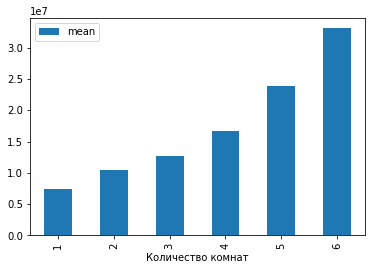

In [51]:
df.groupby('Количество комнат')['Стоимость, р.'].agg(['mean']).plot(kind='bar')

<AxesSubplot:>

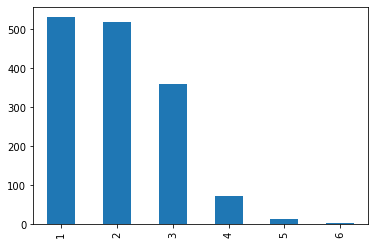

In [52]:
df['Количество комнат'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Количество комнат'>

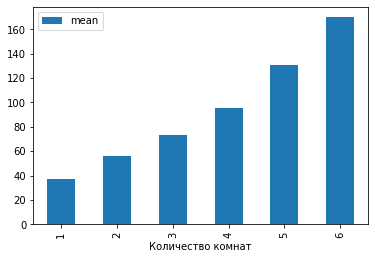

In [54]:
df.groupby(['Количество комнат'])['Общая площадь, м^2'].agg(['mean']).plot(kind='bar')

<AxesSubplot:xlabel='Стоимость, р.'>

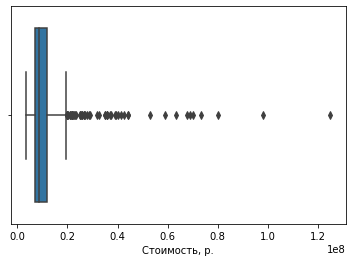

In [61]:
import seaborn as sns

sns.boxplot(x=df['Стоимость, р.'])

<AxesSubplot:xlabel='Стоимость, р.', ylabel='Count'>

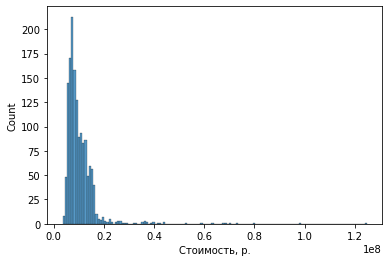

In [62]:
sns.histplot(df['Стоимость, р.'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Стоимость, р.', ylabel='Density'>

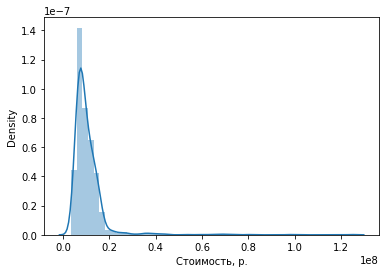

In [63]:
sns.distplot(df['Стоимость, р.'])